
# Attempt at building a dataset to use for ML (Apiary season)
### *** Can you create a model to predict hive survival based on observations of reported hive data? ***

In [ ]:
# *** Can you create a model to predict hive survival based on observations of reported hive data? ***
# This will also require that another column of 'Survival' (binary) will be needed (randomized)

# A neat aspect of creating data is that I can creat two completely different random datasets to use. One for model training/evaluation;
# and the other as a completely naive test set :)


In [1]:
### Import packages to pull csv file from repo for analysis
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import requests
from urllib.request import urlretrieve

In [2]:
### read in the fabricated dataset for the random apiary data
fabap_url = 'https://raw.githubusercontent.com/ContoakleyK/BIOF509-Bee-Trends/master/Apiary_seasons_fabricated_data.csv'
fabap_df = pd.read_csv(fabap_url)
print(fabap_df.shape)

fabap_df.info()

(793, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 7 columns):
Varroa Mites observed                  rand=0.1-133                 793 non-null int64
Hours of Sun,   Apr-Oct, 2018         rand=509-3374                 793 non-null int64
Wax Moth Observed             rand=0-15                             793 non-null int64
Total Honey Collected      (weight in g)         rand=2000-20000    793 non-null int64
Swarm Attempt (Yes = 1; 0 = No)                                     793 non-null int64
Queen Cells produced               rand=0-6                         793 non-null int64
Survival (Yes = 1, 0 = No)                                          793 non-null int64
dtypes: int64(7)
memory usage: 43.4 KB


In [3]:
fabap_df.describe()

,Varroa Mites observed rand=0.1-133,"Hours of Sun, Apr-Oct, 2018 rand=509-3374",Wax Moth Observed rand=0-15,Total Honey Collected (weight in g) rand=2000-20000,Swarm Attempt (Yes = 1; 0 = No),Queen Cells produced rand=0-6,"Survival (Yes = 1, 0 = No)"
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,66.244641,1923.451450,7.495586,8142.324086,0.504414,3.093317,0.484237
std,38.544487,837.631776,4.614185,3953.733002,0.500296,2.077141,0.500067
min,1.000000,509.000000,0.000000,1232.000000,0.000000,0.000000,0.000000
25%,33.000000,1163.000000,3.000000,4696.000000,0.000000,1.000000,0.000000
50%,66.000000,1934.000000,7.000000,8202.000000,1.000000,3.000000,0.000000
75%,100.000000,2673.000000,12.000000,11471.000000,1.000000,5.000000,1.000000
max,133.000000,3369.000000,15.000000,14956.000000,1.000000,6.000000,1.000000


In [4]:
fabap_df

,Varroa Mites observed rand=0.1-133,"Hours of Sun, Apr-Oct, 2018 rand=509-3374",Wax Moth Observed rand=0-15,Total Honey Collected (weight in g) rand=2000-20000,Swarm Attempt (Yes = 1; 0 = No),Queen Cells produced rand=0-6,"Survival (Yes = 1, 0 = No)"
0,89,2411,3,12356,0,0,1
1,39,2080,13,9949,1,4,0
2,34,2983,5,5842,0,1,0
3,83,516,8,5658,1,3,1
4,105,2942,14,11488,0,1,0
5,14,2910,0,9891,1,1,1
6,73,2947,14,7533,0,4,1
7,74,2340,5,12818,1,0,1
8,21,512,8,1844,0,3,1
9,85,3006,9,14597,0,6,0


In [6]:
# edit the column headings to remove the randomization criteria used to generate them.
fabap_df.columns=['Varroa Mites','Sunshine (hr)', 'Wax Moths','Honey Collected (g)','Swarm','Queen Cells','Survival']
fabap_df.head()

,Varroa Mites,Sunshine (hr),Wax Moths,Honey Collected (g),Swarm,Queen Cells,Survival
0,89,2411,3,12356,0,0,1
1,39,2080,13,9949,1,4,0
2,34,2983,5,5842,0,1,0
3,83,516,8,5658,1,3,1
4,105,2942,14,11488,0,1,0


In [7]:
# convert values from the 'Sunshine (hr)' column from hours to days; and the 'Honey Collected (g)' column values to kg
fabap_df['Sunshine (days)'] = fabap_df['Sunshine (hr)'].apply(lambda val: val/24)
fabap_df['Honey Collected (kg)'] = fabap_df['Honey Collected (g)'].apply(lambda val: val/1000)
fabap_df.head()

,Varroa Mites,Sunshine (hr),Wax Moths,Honey Collected (g),Swarm,Queen Cells,Survival,Sunshine (days),Honey Collected (kg)
0,89,2411,3,12356,0,0,1,100.458333,12.356
1,39,2080,13,9949,1,4,0,86.666667,9.949
2,34,2983,5,5842,0,1,0,124.291667,5.842
3,83,516,8,5658,1,3,1,21.500000,5.658
4,105,2942,14,11488,0,1,0,122.583333,11.488


In [8]:
# drop the old columns 
fabap_df = fabap_df.drop(['Sunshine (hr)','Honey Collected (g)'], axis=1)
fabap_df.head()

,Varroa Mites,Wax Moths,Swarm,Queen Cells,Survival,Sunshine (days),Honey Collected (kg)
0,89,3,0,0,1,100.458333,12.356
1,39,13,1,4,0,86.666667,9.949
2,34,5,0,1,0,124.291667,5.842
3,83,8,1,3,1,21.500000,5.658
4,105,14,0,1,0,122.583333,11.488


In [9]:
fabap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 7 columns):
Varroa Mites            793 non-null int64
Wax Moths               793 non-null int64
Swarm                   793 non-null int64
Queen Cells             793 non-null int64
Survival                793 non-null int64
Sunshine (days)         793 non-null float64
Honey Collected (kg)    793 non-null float64
dtypes: float64(2), int64(5)
memory usage: 43.4 KB


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


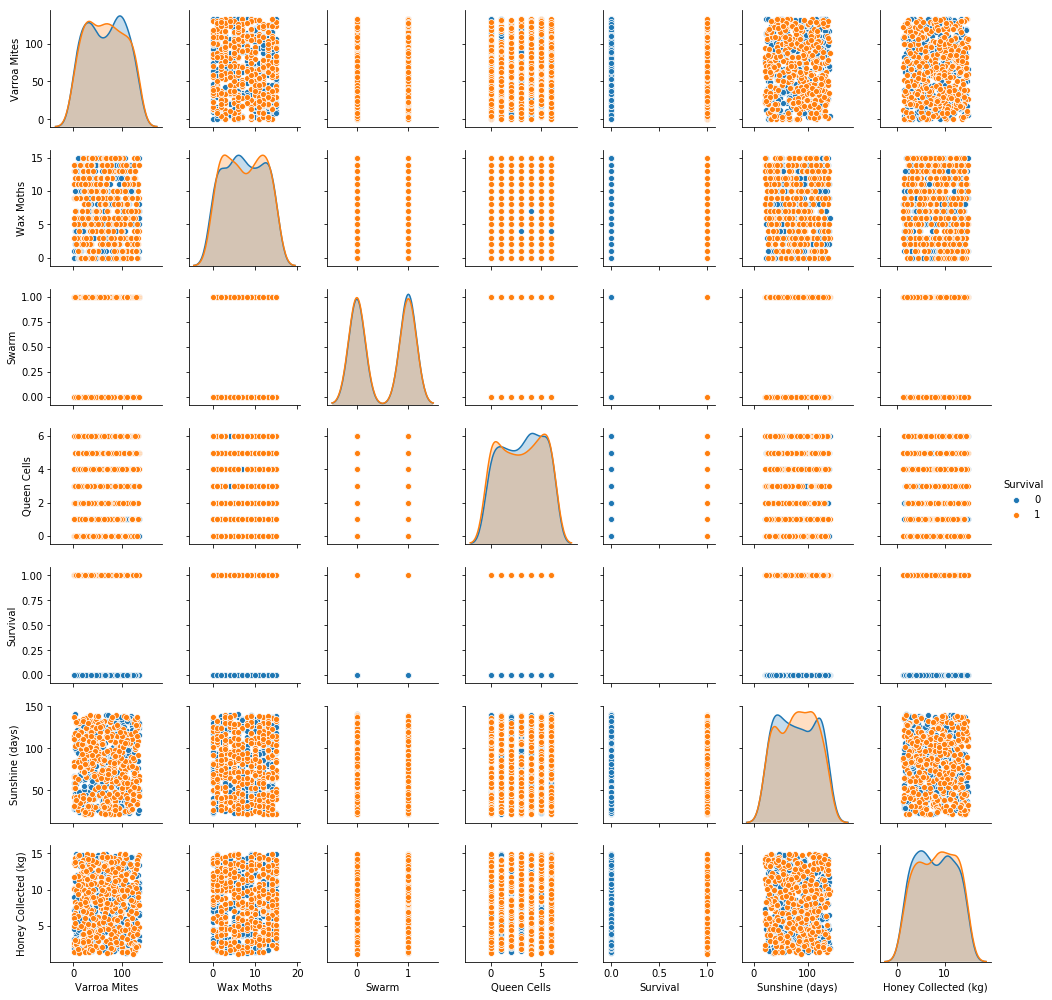

In [10]:
# data visualization with pair plot
sns.pairplot(fabap_df, hue='Survival', height=2.0)

# Standardizing the Data


In [11]:
# Check the variance of the data
print(fabap_df.var())

Varroa Mites            1485.677449
Wax Moths                 21.290700
Swarm                      0.250296
Queen Cells                4.314513
Survival                   0.250067
Sunshine (days)         1218.102418
Honey Collected (kg)      15.632005
dtype: float64


In [12]:
# Apply the log normalization function to the Varroa Mites and Sunshine (days) columns
fabap_df['Varroa_log'] = np.log(fabap_df['Varroa Mites'])
fabap_df['Sunny_log'] = np.log(fabap_df['Sunshine (days)'])


# Check the variance of the columns again
print(fabap_df['Sunny_log'].var())
print(fabap_df['Varroa_log'].var())

# There are values=0 in the Varroa Mites column. While scaling, an error results due to division by zero

0.26540014668125983
0.9665907760112827


In [81]:
# the data needs to be scaled: try Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Var_subset = fabap_df[["Varroa Mites"]]
Varroa_scaled = pd.DataFrame(scaler.fit_transform(Var_subset))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
# Check the variance of the data
print(fabap_df.var())
print(fabap_df.shape)

Varroa Mites            1485.677449
Wax Moths                 21.290700
Swarm                      0.250296
Queen Cells                4.314513
Survival                   0.250067
Sunshine (days)         1218.102418
Honey Collected (kg)      15.632005
Varroa_log                 0.966591
Sunny_log                  0.265400
dtype: float64
(793, 9)


In [54]:
# create a scaled DataFrame to compare accuracy scores from original to normalized
fabap_norm = fabap_df.take([1,2,3,4,6,7,8], axis=1)
fabap_norm.head()

,Wax Moths,Swarm,Queen Cells,Survival,Honey Collected (kg),Varroa_log,Sunny_log
0,3,0,0,1,12.356,4.488636,4.609743
1,13,1,4,0,9.949,3.663562,4.462069
2,5,0,1,0,5.842,3.526361,4.822631
3,8,1,3,1,5.658,4.418841,3.068053
4,14,0,1,0,11.488,4.653960,4.808791


In [55]:
# confirm variance of the normalized data
print(fabap_norm.var())

Wax Moths               21.290700
Swarm                    0.250296
Queen Cells              4.314513
Survival                 0.250067
Honey Collected (kg)    15.632005
Varroa_log               0.966591
Sunny_log                0.265400
dtype: float64


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


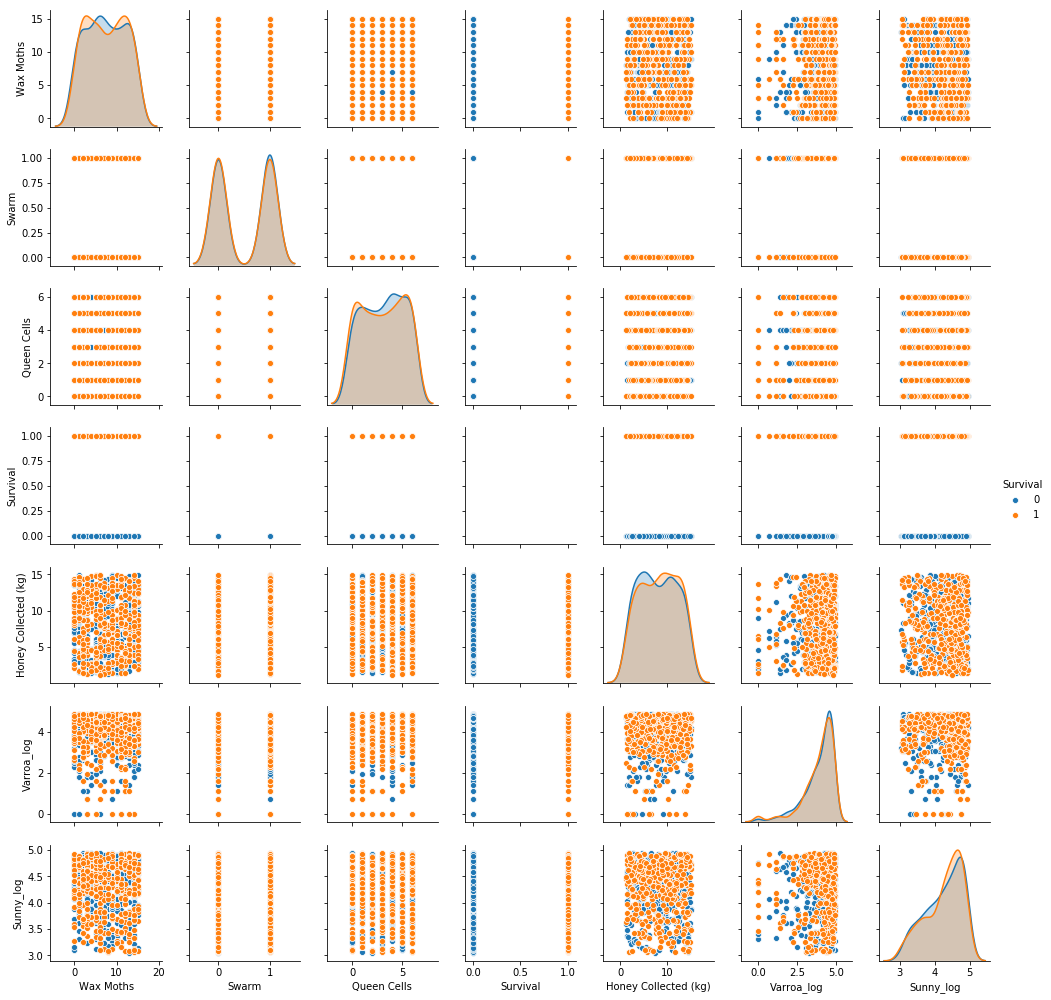

In [115]:
# data visualization with pair plot
sns.pairplot(fabap_norm, hue='Survival', height=2.0)

In [56]:
# define X for scaling purposes
X = fabap_norm.drop(['Survival'], axis=1)

In [57]:
# the data needs to be scaled: try Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
# the data needs to be scaled: Try MinMaxScaler as well 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

X_mM = pd.DataFrame(scale.fit_transform(X))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [59]:
print(X_scaled.describe())

                  0             1             2             3             4  \
count  7.930000e+02  7.930000e+02  7.930000e+02  7.930000e+02  7.930000e+02   
mean   9.800203e-18 -2.959661e-16 -1.932040e-17 -1.026221e-16  5.369111e-17   
std    1.000631e+00  1.000631e+00  1.000631e+00  1.000631e+00  1.000631e+00   
min   -1.625491e+00 -1.008867e+00 -1.490158e+00 -1.748900e+00 -3.956118e+00   
25%   -9.749119e-01 -1.008867e+00 -1.008424e+00 -8.722135e-01 -3.974527e-01   
50%   -1.074728e-01  9.912114e-01 -4.495382e-02  1.510309e-02  3.080167e-01   
75%    9.768262e-01  9.912114e-01  9.185159e-01  8.424384e-01  7.309188e-01   
max    1.627406e+00  9.912114e-01  1.400251e+00  1.724440e+00  1.021167e+00   

                  5  
count  7.930000e+02  
mean   9.177190e-16  
std    1.000631e+00  
min   -2.354812e+00  
25%   -7.498431e-01  
50%    2.380026e-01  
75%    8.665626e-01  
max    1.316046e+00  


In [60]:
print(X_mM.describe())

                0           1           2           3           4           5
count  793.000000  793.000000  793.000000  793.000000  793.000000  793.000000
mean     0.499706    0.504414    0.515553    0.503521    0.794834    0.641488
std      0.307612    0.500296    0.346190    0.288089    0.201040    0.272588
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.200000    0.000000    0.166667    0.252405    0.714981    0.437219
50%      0.466667    1.000000    0.500000    0.507869    0.856719    0.706324
75%      0.800000    1.000000    0.833333    0.746065    0.941685    0.877553
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000


In [61]:
# Import Train/Test Split + Fit/Predict/Accuracy classification tools
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier()

In [62]:
# Create a data with all columns except 'Survival'
X = fabap_df.drop('Survival', axis=1)

# Create a 'Survival' labels dataset
y = fabap_df[['Survival']]

# Use stratified sampling to split up the dataset according to the y dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Print out the category_desc counts on the training y labels
print(y_train['Survival'].value_counts())
print('\n', y_train.head())


0    306
1    288
Name: Survival, dtype: int64

      Survival
734         0
533         1
504         0
68          0
174         1


In [70]:
# Check classification KNN on the fit data from above (Supervised Learning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(6)

knn.fit(X_train, np.ravel(y_train,order='C'))
y_pred= knn.predict(X_test)

print(accuracy_score(y_test, y_pred))



0.5829145728643216


In [73]:
# Split the dataset and labels into training and test sets based on X_mM (MinMaxScaled)
X_train, X_test, y_train, y_test = train_test_split(X_mM,y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, np.ravel(y_train,order='C'))

# Score the model on the test data
print(knn.score(X_test, y_test))

0.5125628140703518


# Unsupervised Learning - Clustering

In [72]:
# Import KMeans
from sklearn.cluster import KMeans

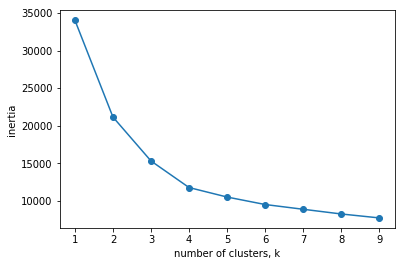

In [77]:
# Investigate the number of clusters that might be a good choice using KMeans to observe where the inertia decreases
# 5 may be about right

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(fabap_norm)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


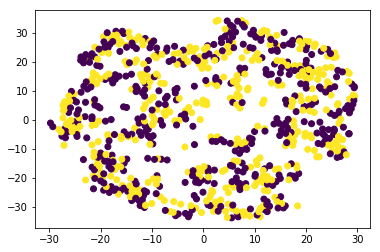

In [94]:
# Import TSNE
from sklearn.manifold import TSNE
surv = fabap_norm['Survival']

# Create a TSNE instance: model
mtsne = TSNE(learning_rate=800)

# Apply fit_transform to fabap_norm: tsne_features
tsne_features = mtsne.fit_transform(fabap_norm)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=surv)
plt.show()

In [ ]:
# looks like PCA might be useful to tease out identity of the clusters

# Unsupervised Learning - Dimensionality Reduction

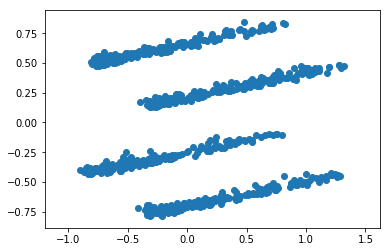

-1.4578168296152703e-16


In [108]:
# decorrelate the data with PCA 
# Import PCA
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to fabap_norm: pca_features
pca_features = model.fit_transform(fabap_norm)

# Assign 0th column of pca_features: xs
xs = pca_features[:,4]

# Assign 1st column of pca_features: ys
ys = pca_features[:,5]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


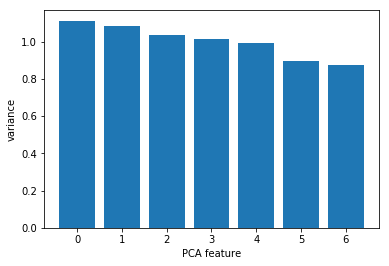

In [109]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'fabap_norm'
pipeline.fit(fabap_norm)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [ ]:
# Doing this PCA analysis of variance for the components, it is obvious that the data has a large intrinsic dimensionality (=7)


In [110]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=5)

# Fit the model to the normalized data
model.fit(fabap_norm)

# Transform the data: nmf_features
nmf_features = model.transform(fabap_norm)

# Print the NMF features
print(nmf_features)

[[7.47632582e-01 1.83625976e-01 5.12964649e-04 3.25015932e-01
  3.77768226e-01]
 [6.32425660e-01 7.97544962e-01 3.65654050e-01 2.58599547e-01
  2.13988481e-01]
 [2.83628122e-01 3.06614854e-01 9.24812027e-02 2.83127139e-01
  3.83263201e-01]
 ...
 [5.52641615e-01 8.58975392e-01 2.74785595e-01 3.74405038e-01
  2.74433197e-02]
 [8.14789551e-02 4.91091008e-01 4.56684715e-01 4.12769884e-01
  2.11034107e-01]
 [6.93528511e-01 8.58866092e-01 5.49403990e-01 2.43551763e-01
  2.19107286e-01]]


# Make a pipeline for Naive data

In [79]:
from sklearn.pipeline import make_pipeline

# Fit the pipeline to naive data
pipeline.fit(naive)

# Calculate the cluster labels: labels
labels = pipeline.predict(naive)

# Create a DataFrame with labels and survival as columns: df
df = pd.DataFrame({'labels': labels, 'survival': survival})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['survival'])

# Display ct
print(ct)